Glass Identification

Project Description
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-

1.	 Id number: 1 to 214

2.	 RI: refractive index

3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

4.	Mg: Magnesium

5.	Al: Aluminum

6.	Si: Silicon

7.	K: Potassium

8.	Ca: Calcium

9.	Ba: Barium

10.	Fe: Iron

11.	Type of glass: (class attribute)

•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps
There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 
Predict : Type of glass


Dataset Link-
•	https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv
•	https://github.com/dsrscientist/dataset3


# IMPORT IMPORTANT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


from sklearn.naive_bayes import MultinomialNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC 

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# IMPORTING DATASET

In [2]:
df=pd.read_csv("glass.csv")
df

,Id number,RI: refractive index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba: Barium,Fe: Iron,Type of glass: (class attribute)
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


we observe that there is 214 row and 11 columns are present in this dataset

# PRINT DATAFRAME

In [3]:
df.head()

,Id number,RI: refractive index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba: Barium,Fe: Iron,Type of glass: (class attribute)
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.columns

Index(['Id number', 'RI: refractive index', 'Na: Sodium ', 'Mg: Magnesium',
       'Al: Aluminum', 'Si: Silicon', 'K: Potassium', 'Ca: Calcium',
       'Ba: Barium', 'Fe: Iron', 'Type of glass: (class attribute)'],
      dtype='object')

In [5]:
df.columns.to_list()

['Id number',
 'RI: refractive index',
 'Na: Sodium ',
 'Mg: Magnesium',
 'Al: Aluminum',
 'Si: Silicon',
 'K: Potassium',
 'Ca: Calcium',
 'Ba: Barium',
 'Fe: Iron',
 'Type of glass: (class attribute)']

In [6]:
df.tail()

,Id number,RI: refractive index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba: Barium,Fe: Iron,Type of glass: (class attribute)
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


# CHECK DATA TYPES AND DATA DISTRIBUTION

In [7]:
#checking the null value of  column of dataset
df.isnull().sum()

Id number                           0
RI: refractive index                0
Na: Sodium                          0
Mg: Magnesium                       0
Al: Aluminum                        0
Si: Silicon                         0
K: Potassium                        0
Ca: Calcium                         0
Ba: Barium                          0
Fe: Iron                            0
Type of glass: (class attribute)    0
dtype: int64

we observe that there is no null value is present in any features

In [8]:
df.dtypes

Id number                             int64
RI: refractive index                float64
Na: Sodium                          float64
Mg: Magnesium                       float64
Al: Aluminum                        float64
Si: Silicon                         float64
K: Potassium                        float64
Ca: Calcium                         float64
Ba: Barium                          float64
Fe: Iron                            float64
Type of glass: (class attribute)      int64
dtype: object

we observe there is no object datatypes are present only two type od data float and int present

In [9]:
print("Number of null or missing values in dataset",df.isnull().sum().sum())

Number of null or missing values in dataset 0


<Axes: >

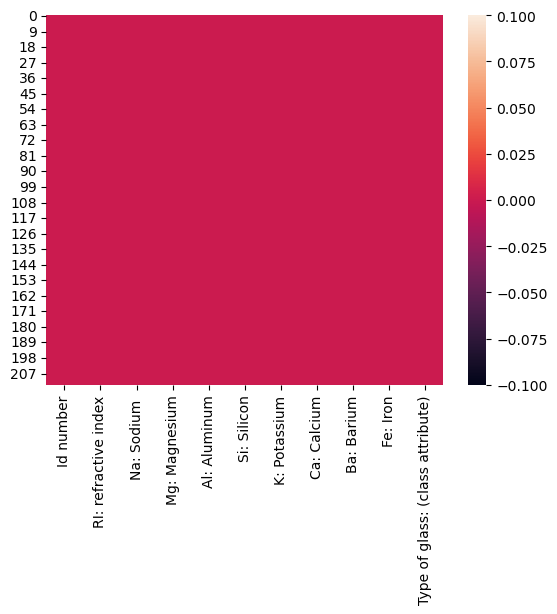

In [10]:
#checking the null value of  column of dataset by heat map
sns.heatmap(df.isnull())

we observe by heat map that there is no null value is present in any column

# BASIC INSIGHTS OF DATA

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Id number                         214 non-null    int64  
 1   RI: refractive index              214 non-null    float64
 2   Na: Sodium                        214 non-null    float64
 3   Mg: Magnesium                     214 non-null    float64
 4   Al: Aluminum                      214 non-null    float64
 5   Si: Silicon                       214 non-null    float64
 6   K: Potassium                      214 non-null    float64
 7   Ca: Calcium                       214 non-null    float64
 8   Ba: Barium                        214 non-null    float64
 9   Fe: Iron                          214 non-null    float64
 10  Type of glass: (class attribute)  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


# EXPLORATORY DATA ANALYSIS

In [12]:
#checking the shape of dataset
df.shape

(214, 11)

WE OBSERVE THATT THERE IS 214 ROW AND 11 COLUMN ARE PRESENT

In [13]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
Id number,214
RI: refractive index,178
Na: Sodium,142
Mg: Magnesium,94
Al: Aluminum,118
Si: Silicon,133
K: Potassium,65
Ca: Calcium,143
Ba: Barium,34
Fe: Iron,32


mostly all column have unique value in all row and there are 6 types of glass present

In [14]:
#checking the null value of all column of dataset
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1      1
135    1
137    1
138    1
139    1
      ..
75     1
76     1
77     1
78     1
214    1
Name: Id number, Length: 214, dtype: int64


1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI: refractive index, Length: 178, dtype: int64


13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na: Sodium , Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg: Magnesium, Length: 94, dtype: int64


1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al: Aluminum, Length: 118, dtype: int64


72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si: Silicon, Length: 133, dtype: in

These are the value counts of all columns and we have seen there is no white space are present

In [15]:
#checking the list of counts of target
df["Type of glass: (class attribute)"].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

we observe the 6 types is present but there is no type 4 is present

In [16]:
df["Type of glass: (class attribute)"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass: (class attribute), dtype: int64

we observe that type 2 glass is highest in count

In [17]:
#checking the categorical& numerical value of all column of dataset
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical columns:",categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical columns:",numerical_col)

Categorical columns: []


Numerical columns: ['Id number', 'RI: refractive index', 'Na: Sodium ', 'Mg: Magnesium', 'Al: Aluminum', 'Si: Silicon', 'K: Potassium', 'Ca: Calcium', 'Ba: Barium', 'Fe: Iron', 'Type of glass: (class attribute)']


we observe that there no categorical data only numerical data is present

In [18]:
df.describe()

,Id number,RI: refractive index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba: Barium,Fe: Iron,Type of glass: (class attribute)
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


This gives the all statical information of the numerical columns.

There is no negative or invalid value is present hence we can say

that it is perfect we can obserbe these points:

    1.The counts of all columns are same it means there is no missing value in any column 
    2.The mean value is same as median(50%) in all columns are 
    apoximately equal it meand this data set is normaly distributed 
    columns which means the data is not skewed in these columns
    3.There no any columns in which mean value is less than median(50%) hence there no right skewed 
    4.There is major difference beteen 75% and max in Na and Ca it means the outliers are present in these columns 
    5.In this discription min,std and 25% detail also found
    6. we observe that there are min., 25%,75% value in column Ba and Fe is 0 it will handle by scalling

In [19]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Fe: Iron']=le.fit_transform(df['Fe: Iron'])
df['Fe: Iron']

0      0
1      0
2      0
3      0
4      0
      ..
209    0
210    0
211    0
212    0
213    0
Name: Fe: Iron, Length: 214, dtype: int64

In [20]:
df['Ba: Barium']=le.fit_transform(df['Ba: Barium'])
df['Ba: Barium']

0       0
1       0
2       0
3       0
4       0
       ..
209    20
210    25
211    27
212    24
213    28
Name: Ba: Barium, Length: 214, dtype: int64

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass: (class attribute), dtype: int64


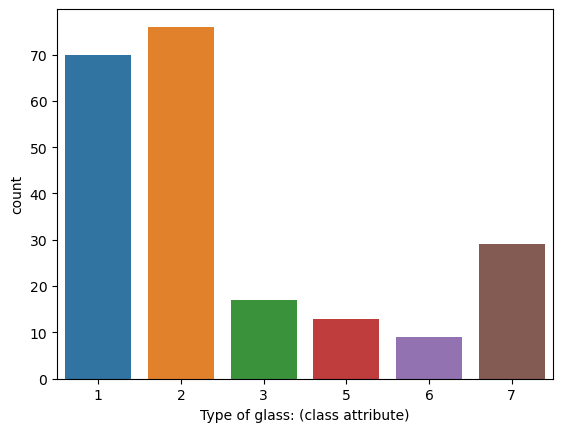

In [21]:
#visualizing the types of glass
ax=sns.countplot(x='Type of glass: (class attribute)',data=df)
print(df['Type of glass: (class attribute)'].value_counts())

we observed that type 2 glass is highest in volume and type 1 is at second number then type 7 is present

# CORRELATION

In [22]:
correlations = df.corr()['Type of glass: (class attribute)'].sort_values(ascending=False)
print(correlations)

Type of glass: (class attribute)    1.000000
Id number                           0.877357
Ba: Barium                          0.645191
Al: Aluminum                        0.598829
Na: Sodium                          0.502898
Si: Silicon                         0.151565
Ca: Calcium                         0.000952
K: Potassium                       -0.010054
RI: refractive index               -0.164237
Fe: Iron                           -0.202271
Mg: Magnesium                      -0.744993
Name: Type of glass: (class attribute), dtype: float64


<Axes: >

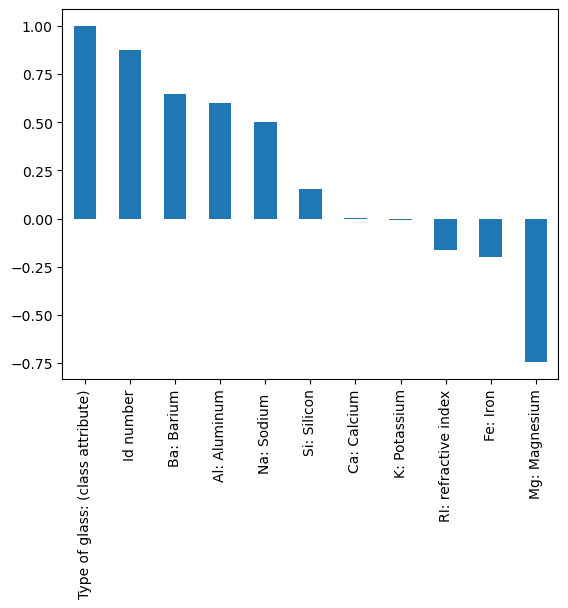

In [23]:
correlations.plot(kind='bar')

we observe that ca and k is not much corellated with any one

<Axes: >

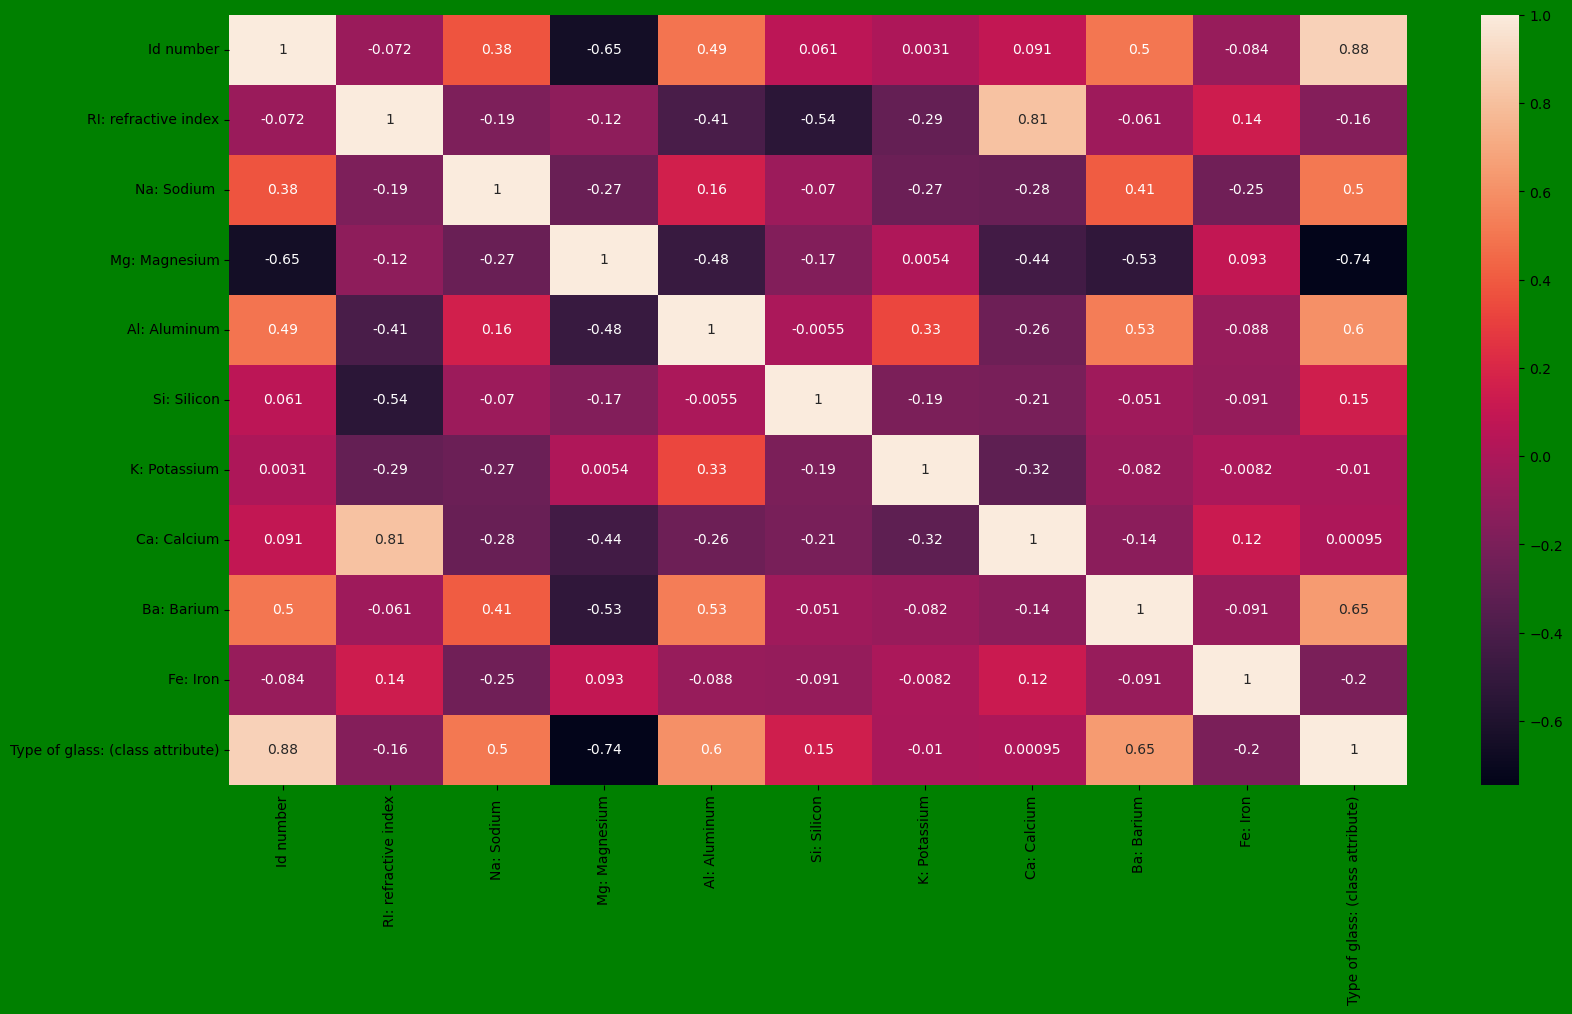

In [24]:
# ploting heatmap
plt.figure(figsize=[19,10],facecolor='green')
sns.heatmap(df.corr(),annot=True)

In [25]:
print(abs(correlations) > 0.2)

Type of glass: (class attribute)     True
Id number                            True
Ba: Barium                           True
Al: Aluminum                         True
Na: Sodium                           True
Si: Silicon                         False
Ca: Calcium                         False
K: Potassium                        False
RI: refractive index                False
Fe: Iron                             True
Mg: Magnesium                        True
Name: Type of glass: (class attribute), dtype: bool


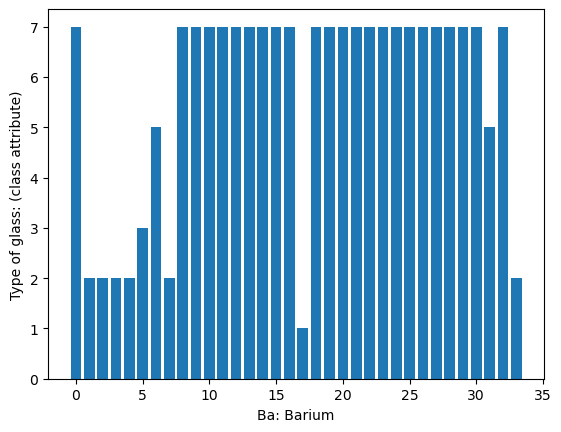

In [26]:
plt.bar(df['Ba: Barium'], df['Type of glass: (class attribute)'])
plt.xlabel('Ba: Barium')
plt.ylabel('Type of glass: (class attribute)')
plt.show()

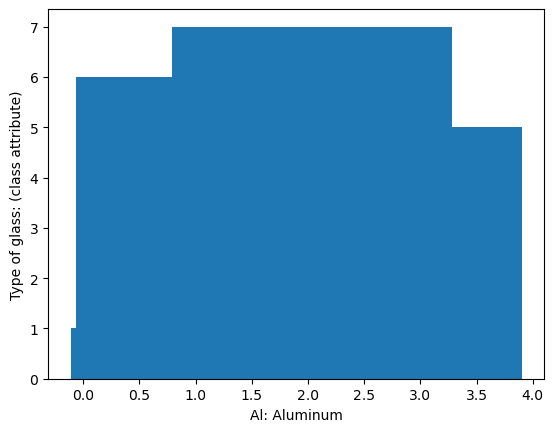

In [27]:
plt.bar(df['Al: Aluminum'], df['Type of glass: (class attribute)'])
plt.xlabel('Al: Aluminum')
plt.ylabel('Type of glass: (class attribute)')
plt.show()

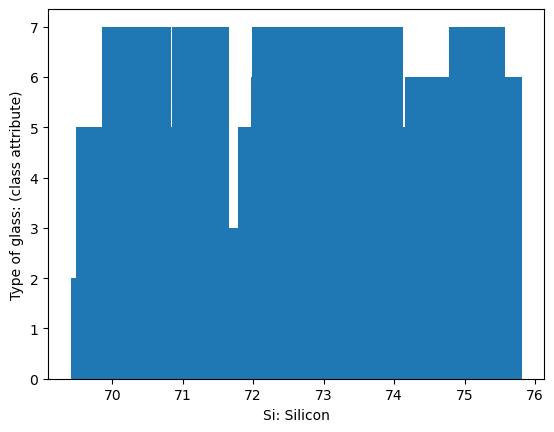

In [28]:
plt.bar(df['Si: Silicon'], df['Type of glass: (class attribute)'])
plt.xlabel('Si: Silicon')
plt.ylabel('Type of glass: (class attribute)')
plt.show()

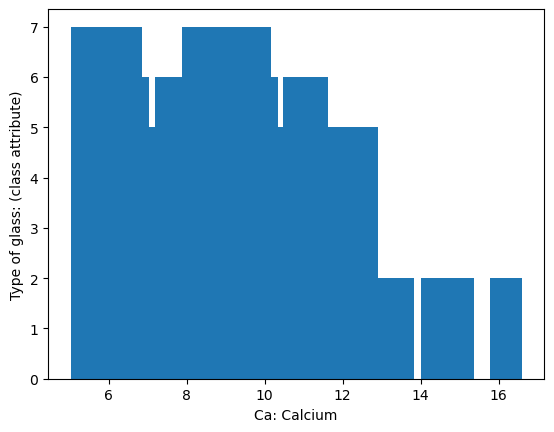

In [29]:
plt.bar(df['Ca: Calcium'], df['Type of glass: (class attribute)'])
plt.xlabel('Ca: Calcium')
plt.ylabel('Type of glass: (class attribute)')
plt.show()

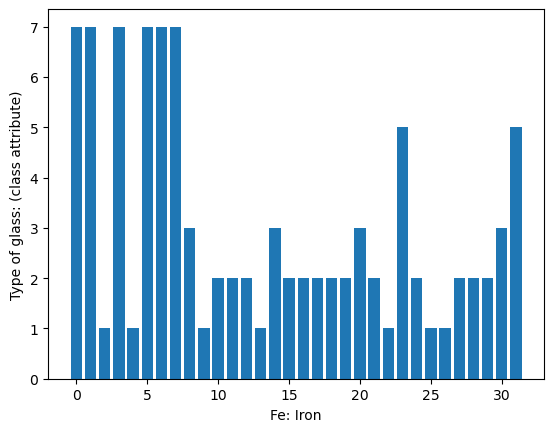

In [30]:
plt.bar(df['Fe: Iron'], df['Type of glass: (class attribute)'])
plt.xlabel('Fe: Iron')
plt.ylabel('Type of glass: (class attribute)')
plt.show()

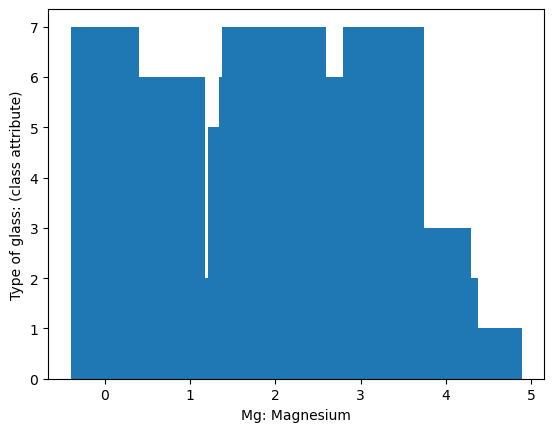

In [31]:
plt.bar(df['Mg: Magnesium'], df['Type of glass: (class attribute)'])
plt.xlabel('Mg: Magnesium')
plt.ylabel('Type of glass: (class attribute)')
plt.show()

 we obseve that dataset appox column are right skewed

[Text(0.5, 1.0, 'Ba Percent in Different Glass')]

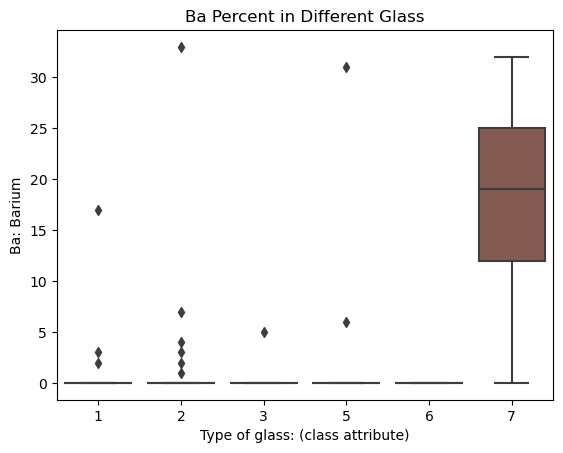

In [32]:
bp = sns.boxplot(x='Type of glass: (class attribute)',y='Ba: Barium', data=df)
bp.set(title="Ba Percent in Different Glass")

[Text(0.5, 1.0, 'Mg Percent in Different Glass')]

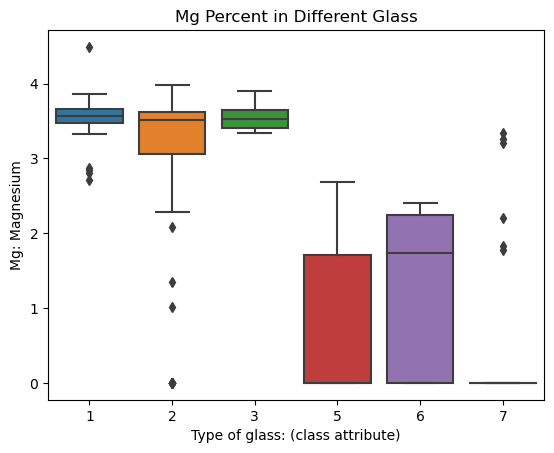

In [33]:
bp = sns.boxplot(x='Type of glass: (class attribute)',y='Mg: Magnesium', data=df)
bp.set(title="Mg Percent in Different Glass")

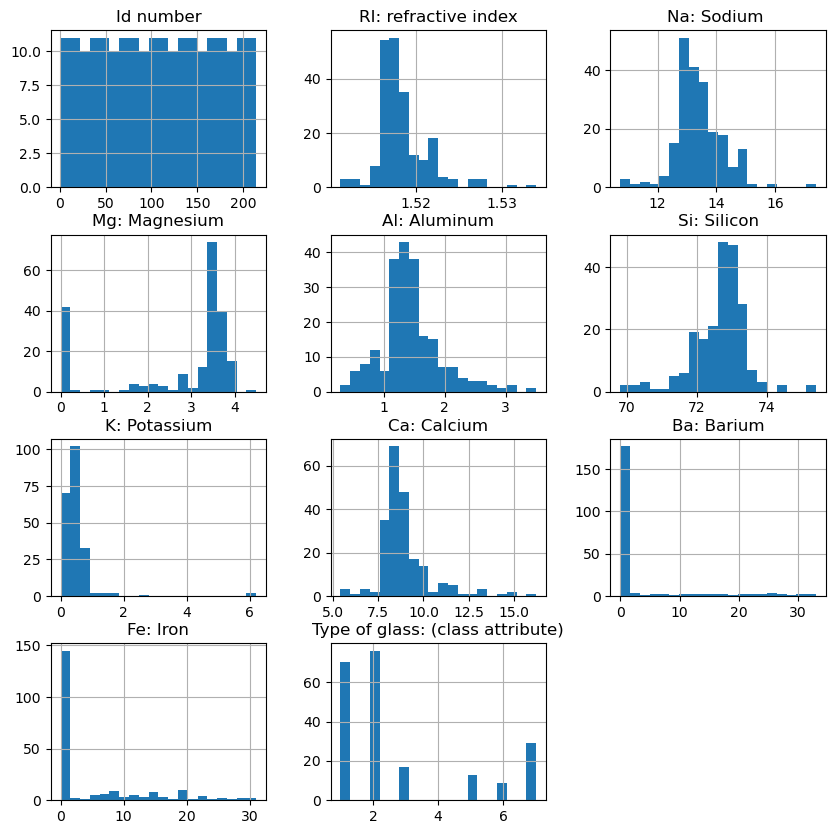

In [34]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

REDUCE SKEWNESS

In [35]:
#checking skewness
df.skew()

Id number                           0.000000
RI: refractive index                1.625431
Na: Sodium                          0.454181
Mg: Magnesium                      -1.152559
Al: Aluminum                        0.907290
Si: Silicon                        -0.730447
K: Potassium                        6.551648
Ca: Calcium                         2.047054
Ba: Barium                          2.603225
Fe: Iron                            1.606494
Type of glass: (class attribute)    1.114915
dtype: float64

In [36]:
df['Al: Aluminum']=np.cbrt(df['Al: Aluminum'])

In [37]:
df['K: Potassium']=np.cbrt(df['K: Potassium'])

In [38]:
df['Ca: Calcium']=np.cbrt(df['Ca: Calcium'])

In [39]:
df['Fe: Iron']=np.cbrt(df['Fe: Iron'])

In [40]:
df['Si: Silicon']=np.cbrt(df['Si: Silicon'])

In [41]:
df['Mg: Magnesium']=np.cbrt(df['Mg: Magnesium'])

In [42]:
df.skew()

Id number                           0.000000
RI: refractive index                1.625431
Na: Sodium                          0.454181
Mg: Magnesium                      -1.440196
Al: Aluminum                       -0.204132
Si: Silicon                        -0.776908
K: Potassium                       -0.591896
Ca: Calcium                         1.407358
Ba: Barium                          2.603225
Fe: Iron                            0.900845
Type of glass: (class attribute)    1.114915
dtype: float64

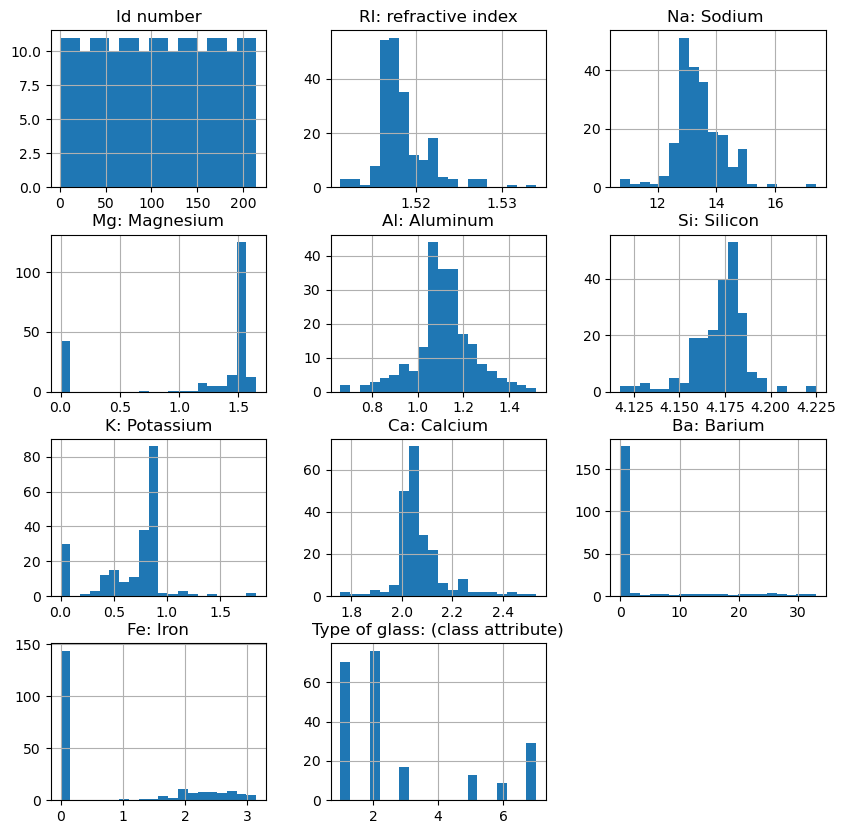

In [43]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

# Feature Selection

Now that we have already studied our dataset through histograms and different graphics it's time to select some 
features we will use in our machine learning algorithms. In this specific case, what we are going to do is use
the same columns we studied before, since those are the four ones that give us the most information between 
features and quality.

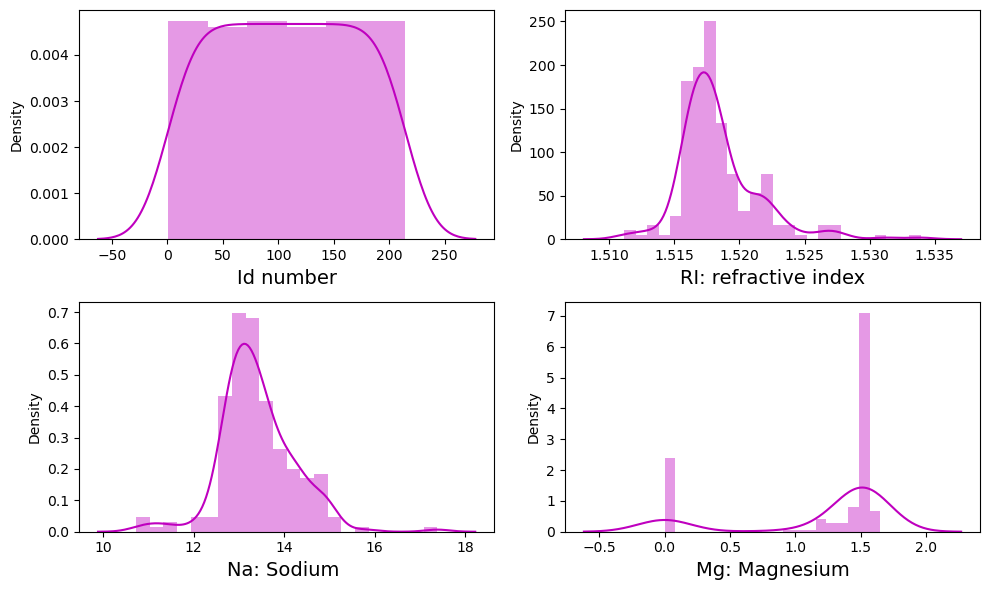

In [44]:
#checking how data is distributed
plt.figure(figsize=(10,6), facecolor ="white")
plotnumber =1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color= "m")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation =0,fontsize = 10 )
    plotnumber+=1
plt.tight_layout()

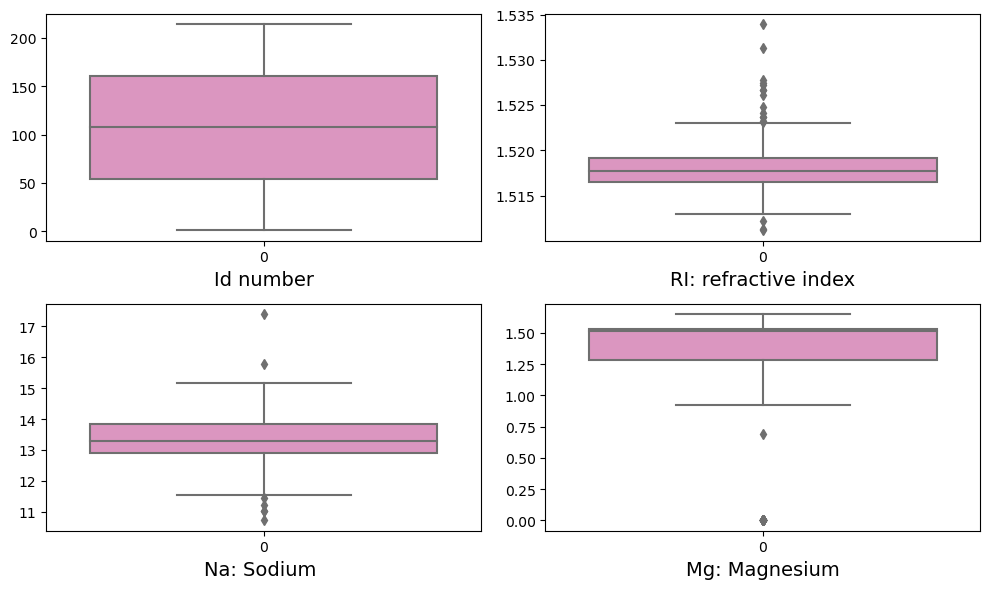

In [45]:
#checking for outliers
plt.figure(figsize=(10,6), facecolor ="white")
plotnumber =1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col], palette = "Set2_r")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation =0,fontsize = 10 )
    plotnumber+=1
plt.tight_layout()

# visualising correlation with target to other value

In [46]:
correlations = df.corr()['Type of glass: (class attribute)'].sort_values(ascending=False)
print(correlations)

Type of glass: (class attribute)    1.000000
Id number                           0.877357
Ba: Barium                          0.645191
Al: Aluminum                        0.540250
Na: Sodium                          0.502898
Si: Silicon                         0.149418
Ca: Calcium                        -0.009394
RI: refractive index               -0.164237
Fe: Iron                           -0.208577
K: Potassium                       -0.433255
Mg: Magnesium                      -0.701285
Name: Type of glass: (class attribute), dtype: float64


In [47]:
cor=df.corr()
cor

,Id number,RI: refractive index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba: Barium,Fe: Iron,Type of glass: (class attribute)
Id number,1.000000,-0.072209,0.375722,-0.607398,0.444521,0.059544,-0.343410,0.080554,0.501550,-0.098546,0.877357
RI: refractive index,-0.072209,1.000000,-0.191885,-0.114063,-0.417835,-0.542505,-0.211897,0.802936,-0.060639,0.131516,-0.164237
Na: Sodium,0.375722,-0.191885,1.000000,-0.277849,0.077449,-0.070672,-0.539820,-0.264986,0.405323,-0.199148,0.502898
Mg: Magnesium,-0.607398,-0.114063,-0.277849,1.000000,-0.375748,-0.168940,0.442902,-0.398712,-0.527993,0.097182,-0.701285
Al: Aluminum,0.444521,-0.417835,0.077449,-0.375748,1.000000,0.030066,0.119934,-0.287665,0.477661,-0.058002,0.540250
Si: Silicon,0.059544,-0.542505,-0.070672,-0.168940,0.030066,1.000000,-0.171894,-0.191018,-0.052674,-0.077526,0.149418
K: Potassium,-0.343410,-0.211897,-0.539820,0.442902,0.119934,-0.171894,1.000000,-0.352345,-0.331168,0.121033,-0.433255
Ca: Calcium,0.080554,0.802936,-0.264986,-0.398712,-0.287665,-0.191018,-0.352345,1.000000,-0.158433,0.115986,-0.009394
Ba: Barium,0.501550,-0.060639,0.405323,-0.527993,0.477661,-0.052674,-0.331168,-0.158433,1.000000,-0.083599,0.645191
Fe: Iron,-0.098546,0.131516,-0.199148,0.097182,-0.058002,-0.077526,0.121033,0.115986,-0.083599,1.000000,-0.208577


<Axes: >

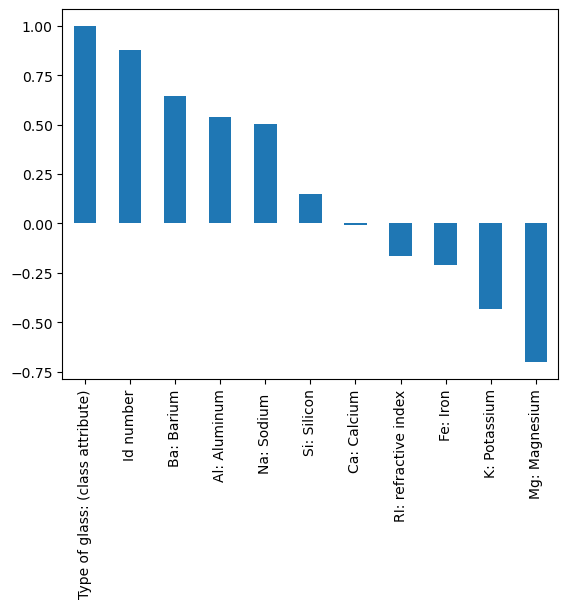

In [48]:
correlations.plot(kind='bar')

# Separating feature and target

In [49]:
df=df.drop("Id number", axis= 1)


In [50]:
df=df.drop("RI: refractive index", axis= 1)

In [51]:
df

,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba: Barium,Fe: Iron,Type of glass: (class attribute)
0,13.64,1.649740,1.032280,4.155926,0.391487,2.060643,0,0.0,1
1,13.89,1.532619,1.107932,4.174180,0.782974,1.985732,0,0.0,1
2,13.53,1.525490,1.154800,4.179148,0.730614,1.981496,0,0.0,1
3,13.21,1.545286,1.088587,4.171883,0.829134,2.018168,0,0.0,1
4,13.27,1.535452,1.074337,4.180865,0.819321,2.005816,0,0.0,1
...,...,...,...,...,...,...,...,...,...
209,14.14,0.000000,1.422757,4.171883,0.430887,2.093860,20,0.0,7
210,14.92,0.000000,1.257818,4.180484,0.000000,2.032793,25,0.0,7
211,14.36,0.000000,1.264107,4.187339,0.000000,2.036014,27,0.0,7
212,14.38,0.000000,1.247194,4.190948,0.000000,2.039226,24,0.0,7


In [52]:
x=df.drop("Type of glass: (class attribute)", axis= 1)
y=df["Type of glass: (class attribute)"]

# Feature Scaling using Standard Scalarization

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba: Barium,Fe: Iron
0,0.284953,0.759032,-0.634449,-1.124991,-0.835901,-0.107657,-0.391045,-0.678225
1,0.591817,0.563835,-0.057329,0.105556,0.346205,-0.841573,-0.391045,-0.678225
2,0.149933,0.551954,0.300216,0.440468,0.188105,-0.883072,-0.391045,-0.678225
3,-0.242853,0.584946,-0.204901,-0.049288,0.485589,-0.523791,-0.391045,-0.678225
4,-0.169205,0.568556,-0.313611,0.556214,0.455958,-0.644800,-0.391045,-0.678225
...,...,...,...,...,...,...,...,...
209,0.898681,-1.990475,2.344370,-0.049288,-0.716931,0.217776,2.269802,-0.678225
210,1.856097,-1.990475,1.086101,0.530501,-2.018006,-0.380508,2.935014,-0.678225
211,1.168721,-1.990475,1.134079,0.992620,-2.018006,-0.348946,3.201099,-0.678225
212,1.193270,-1.990475,1.005054,1.235907,-2.018006,-0.317483,2.801972,-0.678225


we scale the data to overcome biasness

# checking variance inflation Factor(vif)

In [54]:
#find vif in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"] =[variance_inflation_factor(x.values, i)
                    for i in range (len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,4.125662,Na: Sodium
1,4.914459,Mg: Magnesium
2,2.037359,Al: Aluminum
3,2.489437,Si: Silicon
4,4.044450,K: Potassium
5,6.646350,Ca: Calcium
6,2.749766,Ba: Barium
7,1.068536,Fe: Iron


we observe by checking vif values the feature causing multicollineraity problem. in no any one have vif is
more than 10 so no need to drop any feature.and there no multicollineraity problem 

In [55]:
y.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass: (class attribute), dtype: int64

here we observe that data is not balanced so due to classification problem we balance it by oversampling method

# oversampling

In [56]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [57]:
y1.value_counts()

1    76
2    76
3    76
5    76
6    76
7    76
Name: Type of glass: (class attribute), dtype: int64

we observe that all features are balanced

# MODEL

Finding the best random state

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [60]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS  = i
print("Maximum r2 score is =",  maxAccu, "on random_state ", maxRS)

Maximum r2 score is = 0.8099369371467926 on random_state  83


In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = maxRS)

# classification algorithms

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge

In [63]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR= LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_LR)) 
print('R2_score on training Data:',r2_score(y_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_test, pred_LR)) 
print('Mean_Squared_Error:',mean_squared_error(y_test, pred_LR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_LR)))

R2_score: 0.8099369371467926
R2_score on training Data: 68.31536979367252
Mean_Absolute_Error: 0.699628269576407
Mean_Squared_Error: 0.8647981823171734
Root Mean Squared Error: 0.9299452576991688


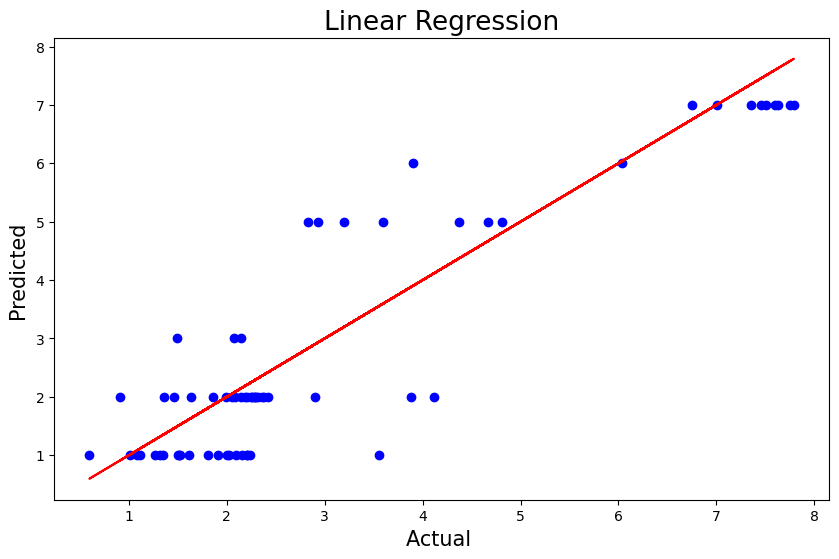

In [65]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='b')
plt.plot(pred_LR,pred_LR,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted ',fontsize=15)
plt.title("Linear Regression",fontsize=19)
plt.show()

In [64]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR= RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_RFR)) 
print('R2_score on training Data:',r2_score(y_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_test, pred_RFR)) 
print('Mean_Squared_Error:',mean_squared_error(y_test, pred_RFR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2_score: 0.7871902569704536
R2_score on training Data: 95.84738701973001
Mean_Absolute_Error: 0.6749230769230768
Mean_Squared_Error: 0.968296923076923
Root Mean Squared Error: 0.9840207940266928


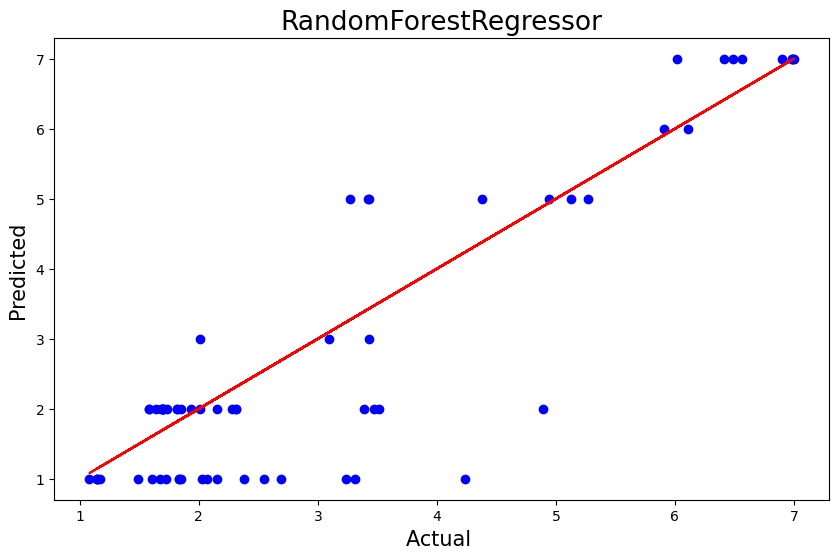

In [66]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_RFR,y=y_test,color='b')
plt.plot(pred_RFR,pred_RFR,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted ',fontsize=15)
plt.title("RandomForestRegressor",fontsize=19)
plt.show()

In [67]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn= knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score:',r2_score(y_test,pred_knn)) 
print('R2_score on training Data:',r2_score(y_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_test, pred_knn)) 
print('Mean_Squared_Error:',mean_squared_error(y_test, pred_knn))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_knn)))

R2_score: 0.7841448189762796
R2_score on training Data: 80.38089304257528
Mean_Absolute_Error: 0.6338461538461538
Mean_Squared_Error: 0.9821538461538462
Root Mean Squared Error: 0.9910367531801463


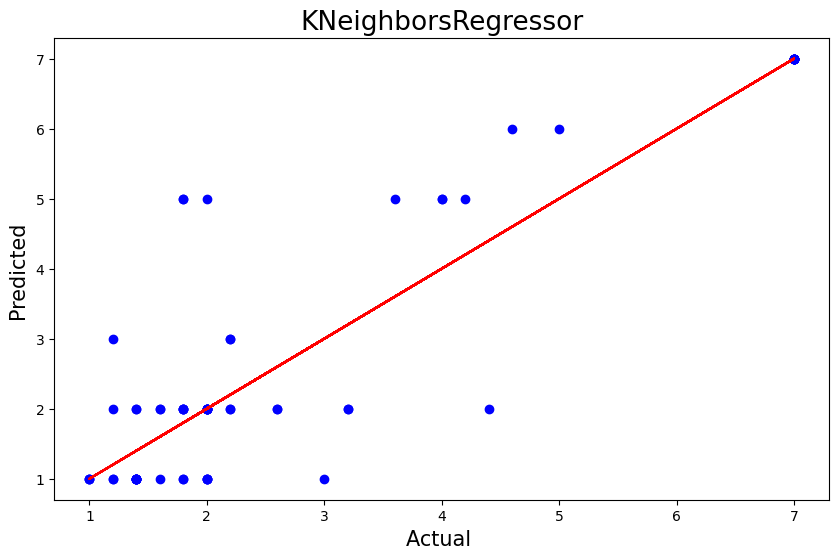

In [68]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_knn,y=y_test,color='b')
plt.plot(pred_knn,pred_knn,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted ',fontsize=15)
plt.title("KNeighborsRegressor",fontsize=19)
plt.show()

In [69]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR= GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_GBR)) 
print('R2_score on training Data:',r2_score(y_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_test, pred_GBR)) 
print('Mean_Squared_Error:',mean_squared_error(y_test, pred_GBR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_GBR)))

R2_score: 0.783185641513134
R2_score on training Data: 98.44433221593334
Mean_Absolute_Error: 0.6517141716477148
Mean_Squared_Error: 0.986518160367222
Root Mean Squared Error: 0.9932362057271281


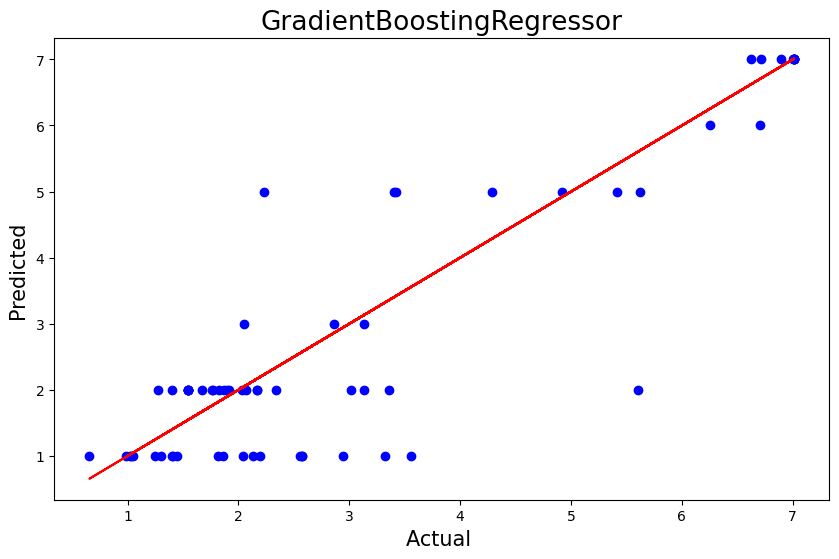

In [70]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_GBR,y=y_test,color='b')
plt.plot(pred_GBR,pred_GBR,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted ',fontsize=15)
plt.title("GradientBoostingRegressor",fontsize=19)
plt.show()

In [71]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso= lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2_score:',r2_score(y_test,pred_lasso)) 
print('R2_score on training Data:',r2_score(y_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_test, pred_lasso)) 
print('Mean_Squared_Error:',mean_squared_error(y_test, pred_lasso))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_lasso)))

R2_score: 0.26786132785797
R2_score on training Data: 21.46667160236757
Mean_Absolute_Error: 1.5448289386542333
Mean_Squared_Error: 3.3312742800611552
Root Mean Squared Error: 1.8251778762797766


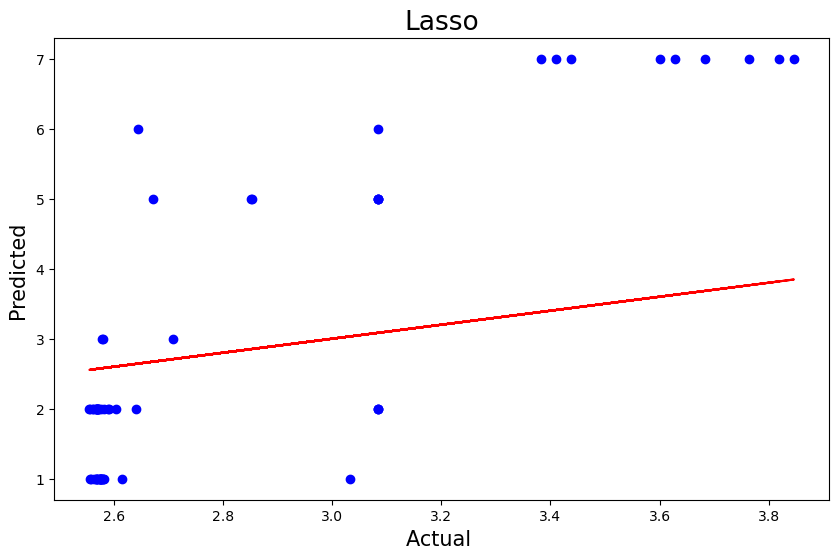

In [72]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_lasso,y=y_test,color='b')
plt.plot(pred_lasso,pred_lasso,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted ',fontsize=15)
plt.title("Lasso",fontsize=19)
plt.show()

In [73]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd= rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_score:',r2_score(y_test,pred_rd)) 
print('R2_score on training Data:',r2_score(y_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_test, pred_rd)) 
print('Mean_Squared_Error:',mean_squared_error(y_test, pred_rd))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_rd)))

R2_score: 0.8099775063522683
R2_score on training Data: 68.31144190730623
Mean_Absolute_Error: 0.7002052315782387
Mean_Squared_Error: 0.8646135900317142
Root Mean Squared Error: 0.9298460033961077


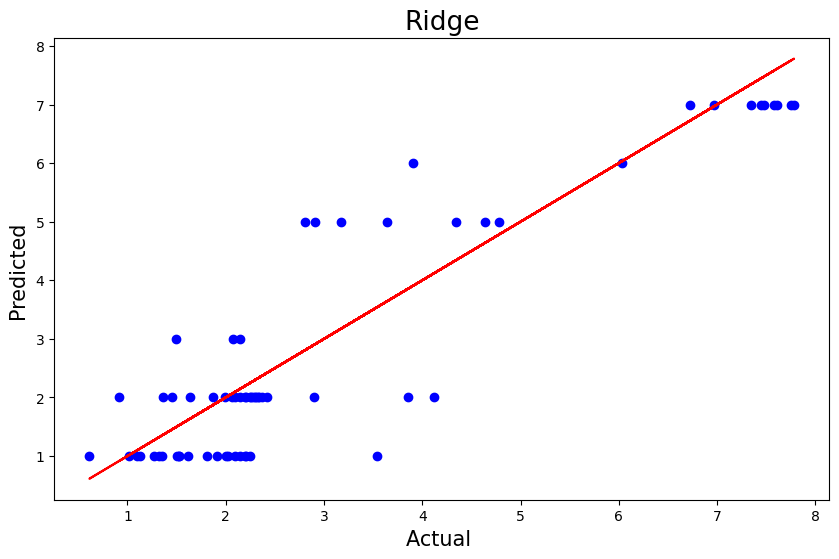

In [74]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_rd,y=y_test,color='b')
plt.plot(pred_rd,pred_rd,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted ',fontsize=15)
plt.title("Ridge",fontsize=19)
plt.show()

In [75]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_DTR= dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_DTR)) 
print('R2_score on training Data:',r2_score(y_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_test, pred_DTR)) 
print('Mean_Squared_Error:',mean_squared_error(y_test, pred_DTR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_DTR)))

R2_score: 0.31361839367457334
R2_score on training Data: 100.0
Mean_Absolute_Error: 0.9384615384615385
Mean_Squared_Error: 3.123076923076923
Root Mean Squared Error: 1.7672229409661144


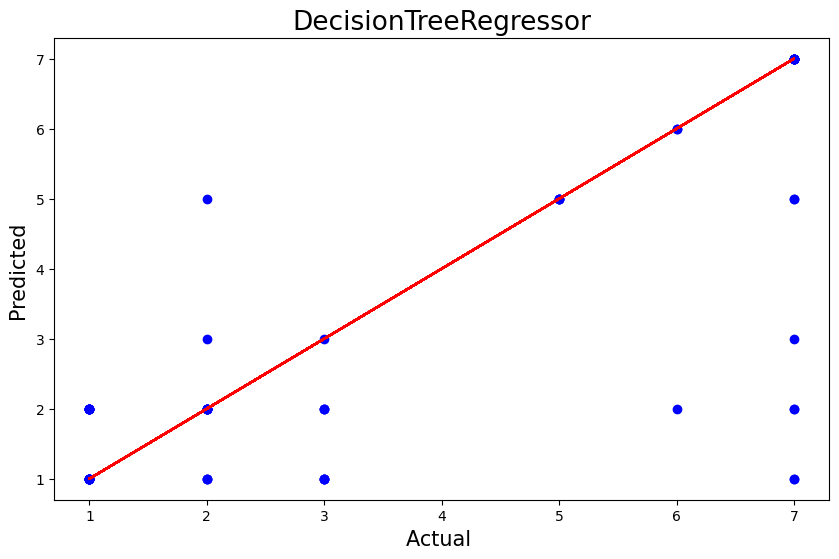

In [76]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_DTR,y=y_test,color='b')
plt.plot(pred_DTR,pred_DTR,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted ',fontsize=15)
plt.title("DecisionTreeRegressor",fontsize=19)
plt.show()

In [77]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_SVR= svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_SVR)) 
print('R2_score on training Data:',r2_score(y_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_test, pred_SVR)) 
print('Mean_Squared_Error:',mean_squared_error(y_test, pred_SVR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_SVR)))

R2_score: 0.8146723200891802
R2_score on training Data: 82.7122738626661
Mean_Absolute_Error: 0.6411727930074477
Mean_Squared_Error: 0.8432519097291359
Root Mean Squared Error: 0.9182874875163747


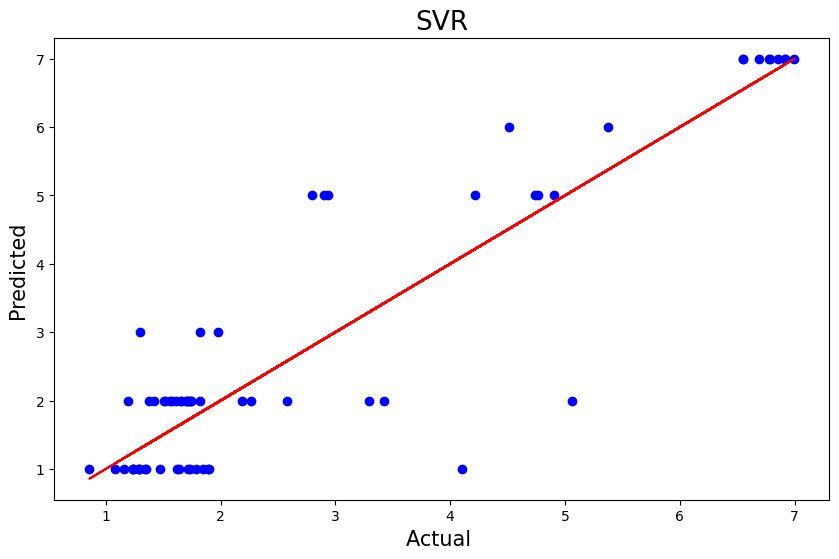

In [79]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_SVR,y=y_test,color='b')
plt.plot(pred_SVR,pred_SVR,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted ',fontsize=15)
plt.title("SVR",fontsize=19)
plt.show()

# Cross Validation Score

In [80]:
from sklearn.model_selection import cross_val_score

In [82]:
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_LR) - score.mean())*100)

[  0.          -2.33931414   0.          -0.51500786 -25.03325703]
-5.577515807176668
Difference between R2 score and cross validation score is : 638.745274432346


In [81]:
score = cross_val_score(RFR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_RFR) - score.mean())*100)

[  0.          -6.42883727   0.          -0.30584658 -25.38172326]
-6.423281420666449
Difference between R2 score and cross validation score is : 721.0471677636903


In [83]:
score = cross_val_score(knn,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_knn) - score.mean())*100)

[  0.          -2.28074074   0.          -0.89592625 -40.01098555]
-8.637530507434658
Difference between R2 score and cross validation score is : 942.1675326410938


In [84]:
score = cross_val_score(GBR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_GBR) - score.mean())*100)

[  0.          -4.56095266   0.          -0.52502426 -22.04131808]
-5.425459000768572
Difference between R2 score and cross validation score is : 620.8644642281706


In [85]:
score = cross_val_score(lasso,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_lasso) - score.mean())*100)

[  0.          -8.43792855   0.           0.10668746 -52.22070814]
-12.110389845244075
Difference between R2 score and cross validation score is : 1237.8251173102046


In [86]:
score = cross_val_score(rd,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_rd) - score.mean())*100)

[  0.          -2.33839306   0.          -0.51039993 -25.43803915]
-5.657366426877465
Difference between R2 score and cross validation score is : 646.7343933229733


In [87]:
score = cross_val_score(dtr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_DTR) - score.mean())*100)

[  0.         -11.44212963   0.          -1.79367867 -21.57293035]
-6.961747729984401
Difference between R2 score and cross validation score is : 727.5366123658974


In [88]:
score = cross_val_score(svr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_SVR) - score.mean())*100)

[  0.          -3.73202928   0.          -0.26104969 -41.03330167]
-9.005276128073728
Difference between R2 score and cross validation score is : 981.9948448162908


GradientBoostingRegressor is our best model as the difference between R2 score and cross validation 
score is - 620.8644642281706 and this is least out of all

finaly we observe that GradientBoostingRegressor is our best mode

# Hyper Parameter Tuning

In [89]:
# Linear Regression
from sklearn.model_selection import GridSearchCV

In [99]:
parameters={'n_estimators':[1,20,40],
            'learning_rate':[0.1,0.5,0.8,0.9],
            'max_depth':[1,2,3],
            'min_samples_split':[1,5,10],                   
            'random_state':[1,4,10,20]
            }

In [100]:
GCV=GridSearchCV(GradientBoostingRegressor(),parameters, cv =5)

In [101]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.5, 0.8, 0.9],
                         'max_depth': [1, 2, 3],
                         'min_samples_split': [1, 5, 10],
                         'n_estimators': [1, 20, 40],
                         'random_state': [1, 4, 10, 20]})

In [102]:
GCV.best_params_

{'learning_rate': 0.5,
 'max_depth': 1,
 'min_samples_split': 1,
 'n_estimators': 20,
 'random_state': 1}

In [104]:
Final_model = GradientBoostingRegressor(learning_rate= 0.5,max_depth=1,min_samples_split = 1,random_state= 1,n_estimators=20)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
print('R2_score:',r2_score(y_test,pred)) 
print('Mean_Absolute_Error:',mean_absolute_error(y_test, pred)) 
print('Mean_Squared_Error:',mean_squared_error(y_test, pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred)))

R2_score: 0.8519075609699762
Mean_Absolute_Error: 0.6118334506707388
Mean_Squared_Error: 0.6738293604528226
Root Mean Squared Error: 0.8208710985610485


# Saving the model

In [105]:
#saving the model using .pkl
import joblib
joblib.dump(Final_model,"Glass_Identification_Prediction_Project_Analysis.pkl")

['Glass_Identification_Prediction_Project_Analysis.pkl']

# predicting the saved model

In [106]:
# first we load the saved model and get prediction
model = joblib.load("Glass_Identification_Prediction_Project_Analysis.pkl")

#prediction
prediction = model.predict(x_test)
prediction

array([1.88663363, 1.4672153 , 0.66543591, 1.74608197, 2.39584129,
       2.41317005, 1.58306149, 2.18679648, 1.73063809, 1.8893427 ,
       2.33738492, 4.30873007, 5.29586557, 1.73063809, 1.77158129,
       6.93716571, 1.73063809, 1.31121976, 1.85367657, 2.39778215,
       3.25535217, 2.15846171, 2.0604591 , 1.25082253, 1.88663363,
       2.0604591 , 1.58814557, 4.1836223 , 3.96528867, 3.8781093 ,
       4.47363544, 5.45884413, 5.62624109, 1.89171771, 2.1948924 ,
       7.24262274, 1.97133887, 1.88663363, 1.73063809, 7.24262274,
       2.10771303, 4.61543894, 7.24262274, 1.73063809, 1.77158129,
       2.3907572 , 1.88663363, 1.72361314, 1.73063809, 5.49260606,
       1.23537865, 1.73063809, 6.93716571, 1.08780205, 1.57307509,
       2.07006934, 1.60970781, 1.72361314, 2.55377768, 3.94984479,
       6.79467319, 6.39138776, 6.67443193, 1.72361314, 4.10778119])

# these are the prediction for Type of glass

In [107]:
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

,Predicted,Original
0,1.886634,2
1,1.467215,3
2,0.665436,1
3,1.746082,2
4,2.395841,1
...,...,...
60,6.794673,7
61,6.391388,7
62,6.674432,7
63,1.723613,2
